In [1]:
import sys
sys.path.insert(0, '..')
import time
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
%matplotlib notebook  
import numpy as np

from Configuration import Configuration
from MotorUnitPool import MotorUnitPool
from AfferentPool import AfferentPool
from SynapsesFactory import SynapsesFactory

In [2]:
conf = Configuration('confH-ReflexM-WaveCurve.rmto')

In [3]:
t = np.arange(0.0, conf.simDuration_ms, conf.timeStep_ms)
Nsim = 40
FirstStim = 7
LastStim = 21
Mp = np.zeros((Nsim, 1))
Hp = np.zeros((Nsim, 1))
Stim = np.zeros((Nsim, 1))


In [4]:
for j  in xrange(0, Nsim):
    Stim[j] = FirstStim + j * (LastStim - FirstStim) / (Nsim - 1)
    conf.changeConfigurationParameter('stimIntensity_PTN', FirstStim + j * (LastStim - FirstStim) / (Nsim - 1),'')
    pools = dict()
    pools[0] = MotorUnitPool(conf, 'SOL')
    pools[1] = AfferentPool(conf,'Ia', 'SOL')
    pools[2]= AfferentPool(conf,'Ia', 'LG')
    Syn = SynapsesFactory(conf, pools)
    del Syn 
    tic = time.clock()
    for i in xrange(0, len(t)-1):
        pools[0].atualizeMotorUnitPool(t[i])
        pools[1].atualizeAfferentPool(t[i])
        pools[2].atualizeAfferentPool(t[i])
    toc = time.clock()
    print str(toc - tic) + ' seconds'
    pools[0].getMotorUnitPoolEMG()
    Mp[j] = np.max(pools[0].emg[t<20]) - np.min(pools[0].emg[t<20])
    Hp[j] = np.max(pools[0].emg[t>20]) - np.min(pools[0].emg[t>20])
    print Mp[j]
    print Hp[j]
    

Motor Unit Pool SOL built
Afferent Pool Ia of muscle SOL built
Afferent Pool Ia of muscle LG built
All the 345697 synapses were built
75.741052 seconds
[ 0.]
[ 0.]
Motor Unit Pool SOL built
Afferent Pool Ia of muscle SOL built
Afferent Pool Ia of muscle LG built
All the 345268 synapses were built
78.145255 seconds
[ 0.]
[ 0.]
Motor Unit Pool SOL built
Afferent Pool Ia of muscle SOL built
Afferent Pool Ia of muscle LG built
All the 345199 synapses were built
75.559586 seconds
[ 0.]
[ 0.]
Motor Unit Pool SOL built
Afferent Pool Ia of muscle SOL built
Afferent Pool Ia of muscle LG built
All the 345560 synapses were built
77.588029 seconds
[ 0.]
[ 0.]
Motor Unit Pool SOL built
Afferent Pool Ia of muscle SOL built
Afferent Pool Ia of muscle LG built
All the 345356 synapses were built
85.54822 seconds
[ 0.]
[ 0.]
Motor Unit Pool SOL built
Afferent Pool Ia of muscle SOL built
Afferent Pool Ia of muscle LG built
All the 345515 synapses were built
79.567433 seconds
[ 0.]
[ 0.]
Motor Unit Pool S

<IPython.core.display.Javascript object>


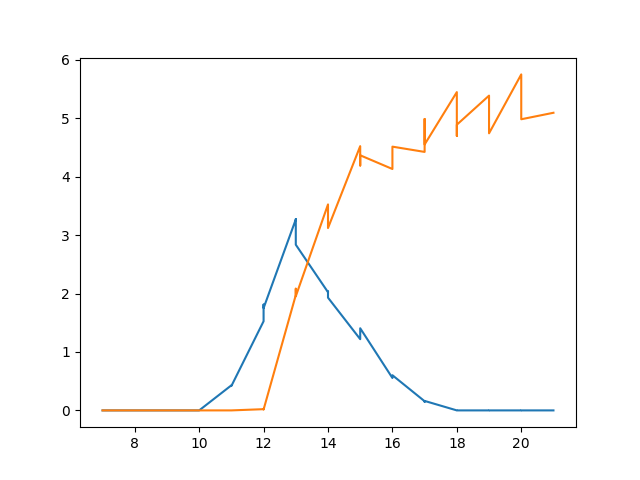

In [5]:
plt.figure()
plt.plot(Stim, Hp, Stim, Mp)

In [6]:
np.max(Hp)/np.max(Mp)

0.56936634575587475

In [7]:
Mp

array([[ 0.        ],
       [ 0.        ],
       [ 0.        ],
       [ 0.        ],
       [ 0.        ],
       [ 0.        ],
       [ 0.        ],
       [ 0.        ],
       [ 0.        ],
       [ 0.        ],
       [ 0.        ],
       [ 0.        ],
       [ 0.        ],
       [ 0.        ],
       [ 0.02102638],
       [ 0.02799676],
       [ 0.01462476],
       [ 1.97447991],
       [ 2.08359328],
       [ 1.95425192],
       [ 3.52633914],
       [ 3.31280336],
       [ 3.12203795],
       [ 4.52470665],
       [ 4.19314778],
       [ 4.36786109],
       [ 4.13327112],
       [ 4.51594917],
       [ 4.42570866],
       [ 4.98941966],
       [ 4.55309326],
       [ 5.44972986],
       [ 4.70013277],
       [ 4.89154678],
       [ 5.38949602],
       [ 5.33054802],
       [ 4.74410619],
       [ 5.75295432],
       [ 4.98482924],
       [ 5.09602152]])

<IPython.core.display.Javascript object>


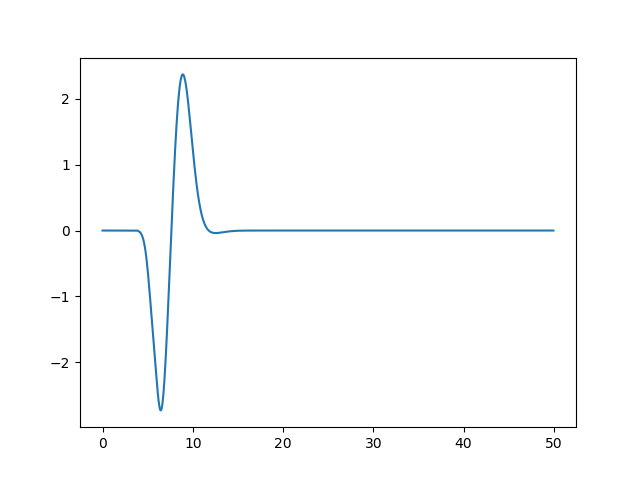

In [8]:
plt.figure()
plt.plot(t, pools[0].emg)